# Equations from the Linear Regression Section

## Linear Regression Model

$$ y(x, w) = w_0 + w_1 x_1 + \dots + w_D x_D \tag{4.1} $$

## General Model with Basis Functions

$$ y(x, w) = w_0 + \sum_{j=1}^{M-1} w_j \phi_j(x) \tag{4.2} $$

With a bias term and a vectorized representation:

$$ y(x, w) = \sum_{j=0}^{M-1} w_j \phi_j(x) = w^\top \phi(x) \tag{4.3} $$

## Gaussian Basis Function

$$ \phi_j(x) = \exp\left(-\frac{(x - \mu_j)^2}{2s^2}\right) \tag{4.4} $$

## Sigmoid Basis Function

$$ \phi_j(x) = \sigma\left(\frac{x - \mu_j}{s}\right) \tag{4.5} $$

where the sigmoid function is defined as:

$$ \sigma(a) = \frac{1}{1 + e^{-a}} \tag{4.6} $$

## Hyperbolic Tangent Basis Function (Equivalent to Sigmoid)

$$ \text{tanh}(a) = 2 \sigma(2a) - 1 \tag{4.7} $$

## Sum-of-Squares Error Function

$$ E_D(w) = \frac{1}{2} \sum_{n=1}^{N} \left(t_n - w^\top \phi(x_n)\right)^2 \tag{4.11} $$

## Maximum Likelihood under Gaussian Noise
Assume:

$$ t = y(x, w) + \epsilon, \quad \epsilon \sim \mathcal{N}(0, \sigma^2) \tag{4.7'} $$

The likelihood is:

$$ p(t | X, w, \sigma^2) = \prod_{n=1}^{N} \mathcal{N}(t_n | w^\top \phi(x_n), \sigma^2) \tag{4.9} $$

Log-likelihood:

$$ \ln p(t | X, w, \sigma^2) = -\frac{N}{2} \ln \sigma^2 - \frac{N}{2} \ln (2\pi) - \frac{1}{2 \sigma^2} \sum_{n=1}^{N} \left(t_n - w^\top \phi(x_n)\right)^2 \tag{4.10} $$

## Regularized Least Squares Solution
The regularized error function is:

$$ E(w) = \frac{1}{2} \sum_{n=1}^{N} \left(t_n - w^\top \phi(x_n)\right)^2 + \frac{\lambda}{2} w^\top w \tag{4.26} $$

The solution is:

$$ w = \left(\lambda I + \Phi^\top \Phi \right)^{-1} \Phi^\top t \tag{4.27} $$


In [7]:
import numpy as np
from typing import Sequence, Callable
import matplotlib.pyplot as plt

# Basis functions

def identity(x: Sequence[float]) -> np.ndarray:
    """Identity basis function (phi_0 = 1)."""
    return (np.ones_like(x)).append(x)

def polynomial_basis(x: Sequence[float], degree: int) -> np.ndarray:
    """Polynomial basis function up to a given degree."""
    return np.vstack([x**i for i in range(1, degree + 1)]).T

def gaussian_basis(x: Sequence[float], centers: Sequence[float], scale: float) -> np.ndarray:
    """Gaussian basis function."""
    return np.vstack([np.exp(-((x - c) ** 2) / (2 * scale ** 2)) for c in centers]).T

def sigmoid_basis(x: Sequence[float], centers: Sequence[float], scale: float) -> np.ndarray:
    """Sigmoid basis function."""
    return np.vstack([1 / (1 + np.exp(-(x - c) / scale)) for c in centers]).T

def tanh_basis(x: Sequence[float], centers: Sequence[float], scale: float) -> np.ndarray:
    """Tanh basis function."""
    return np.vstack([np.tanh((x - c) / scale) for c in centers]).T

class SingleLayerNetwork:
    def __init__(self, M: int):
        """Initialize the single-layer network.
        Args:
            M: Number of basis functions.
        """
        self.M = M

    def func_y(self, x_vec: Sequence[float], w_vec: Sequence[float], *basis_funcs: Sequence[Callable]) -> np.ndarray:
        """Compute the output y(x, w).
        Args:
            x_vec: Input vector.
            w_vec: Weight vector.
            basis_funcs: Basis functions to apply.
        Returns:
            Output value y.
        """
        phi_x = [func(x_vec) for func in basis_funcs]
        phi_x = np.hstack([identity(x_vec)] + phi_x)  # Add constant basis
        return phi_x @ w_vec

class MaximumLikelihood:
    def __init__(self, X: np.ndarray, y: np.ndarray, w_vec: Sequence[float]):
        """Initialize with data and parameters.
        Args:
            X: Input data (design matrix).
            y: Target values.
            w_vec: Weight vector.
        """
        self.X = X
        self.y = y
        self.w_vec = np.array(w_vec)

    def calculate(self) -> float:
        """Calculate maximum likelihood under Gaussian noise.
        Returns:
            Variance sigma^2.
        """
        y_pred = self.predict(self.X)
        residuals = self.y - y_pred
        sigma_squared = np.mean(residuals**2)
        return sigma_squared

    def log_likelihood(self) -> float:
        """Calculate log likelihood under Gaussian noise.
        Returns:
            Log-likelihood value.
        """
        y_pred = self.predict(self.X)
        residuals = self.y - y_pred
        sigma_squared = np.mean(residuals**2)
        n = len(self.y)
        log_likelihood = -0.5 * n * np.log(2 * np.pi * sigma_squared) - (0.5 / sigma_squared) * np.sum(residuals**2)
        return log_likelihood

    def predict(self, X: np.ndarray) -> np.ndarray:
        """Predict output values.
        Args:
            X: Input data (design matrix).
        Returns:
            Predicted values.
        """
        return X @ self.w_vec

# Example Usage

# Create some input/output data
x_n = np.array([0.03, 0.19, 0.34, 0.46, 0.78, 0.81, 1.08, 1.18, 1.39, 1.60, 1.65, 1.90])
t_n = np.array([0.67, 0.85, 1.05, 1.0, 1.40, 1.5, 1.3, 1.54, 1.55, 1.68, 1.73, 1.6])

# Define basis function parameters
M = 4
polynomial_degree = M - 1
centers = np.linspace(min(x_n), max(x_n), M - 1)
scale = 0.2

# Construct basis functions
phi_poly = polynomial_basis(x_n, polynomial_degree)
phi_gaussian = gaussian_basis(x_n, centers, scale)
phi_sigmoid = sigmoid_basis(x_n, centers, scale)
phi_tanh = tanh_basis(x_n, centers, scale)

# Combine basis functions into design matrix
phi_x = np.hstack([identity(x_n)[:, None], phi_poly, phi_gaussian])

# Initialize weights and network
w_vec = np.random.uniform(-1, 1, phi_x.shape[1])
network = SingleLayerNetwork(M=phi_x.shape[1])

# Predict outputs
y_pred = network.func_y(x_n, w_vec, lambda x: phi_poly, lambda x: phi_gaussian)

# Plot results
plt.scatter(x_n, t_n, label="True Data")
plt.plot(x_n, y_pred, label="Predicted", color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Regression with Combined Basis Functions")
plt.show()

# Maximum Likelihood Estimation
mle = MaximumLikelihood(phi_x, t_n, w_vec)
print(f"Log-Likelihood: {mle.log_likelihood()}")
print(f"Variance Estimate (sigma^2): {mle.calculate()}")


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

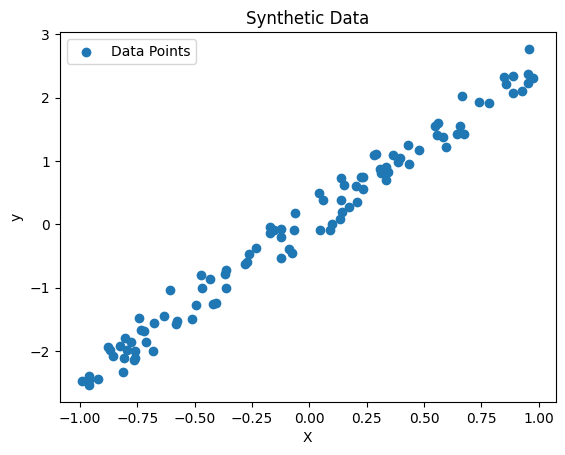

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Step 1: Generate Synthetic Data
def generate_data(n_samples=100):
    np.random.seed(0)
    X = np.random.uniform(-1, 1, n_samples).reshape(-1, 1)
    y = 2.5 * X.squeeze() + np.random.normal(0, 0.2, n_samples)
    return X, y

X, y = generate_data()
plt.scatter(X, y, label="Data Points")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Data")
plt.legend()
plt.show()


In [2]:

# Step 2: Linear Regression using Closed-form Solution
def linear_regression_closed_form(X, y):
    X_design = np.hstack([np.ones((X.shape[0], 1)), X])
    w = np.linalg.inv(X_design.T @ X_design) @ X_design.T @ y
    return w

w = linear_regression_closed_form(X, y)
print(f"Weights: {w}")


Weights: [0.03812372 2.4936935 ]


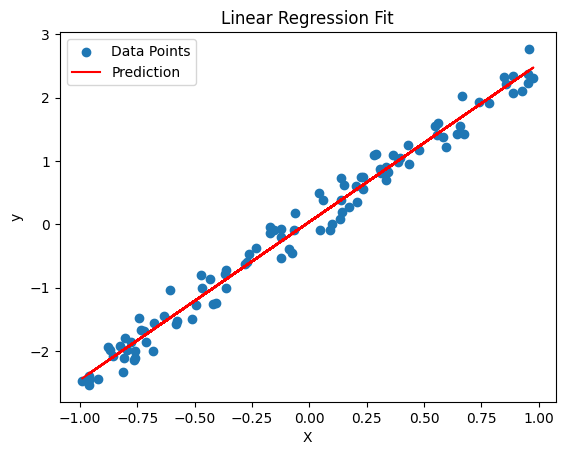

In [3]:

# Step 3: Prediction and Visualization
def predict(X, w):
    X_design = np.hstack([np.ones((X.shape[0], 1)), X])
    return X_design @ w

y_pred = predict(X, w)
plt.scatter(X, y, label="Data Points")
plt.plot(X, y_pred, color="red", label="Prediction")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()


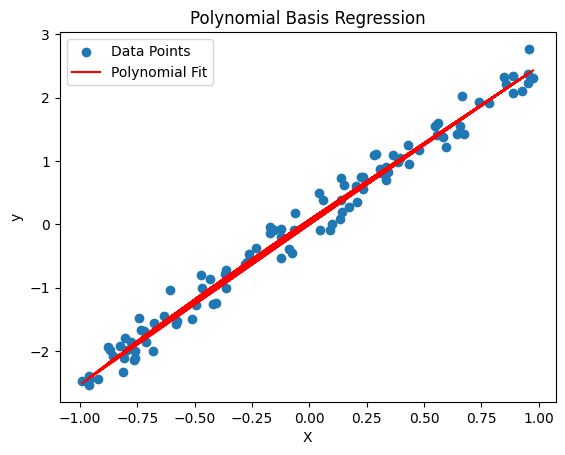

In [4]:

# Step 4: Basis Function Expansion (Polynomial)
def polynomial_basis(X, degree=3):
    return np.hstack([X**i for i in range(degree + 1)])

X_poly = polynomial_basis(X, degree=3)
w_poly = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y

def predict_poly(X, w):
    return X @ w

y_pred_poly = predict_poly(X_poly, w_poly)
plt.scatter(X, y, label="Data Points")
plt.plot(X, y_pred_poly, color="red", label="Polynomial Fit")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial Basis Regression")
plt.legend()
plt.show()


In [6]:
w_poly

array([ 0.06914602,  2.44714821, -0.09199309,  0.06538174])

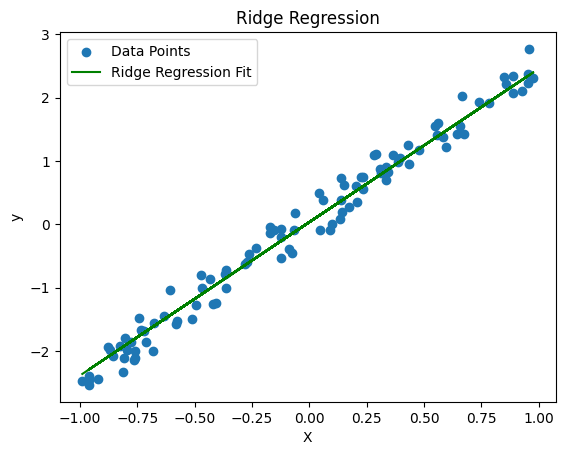

In [5]:

# Step 5: Regularization (Ridge Regression)
def ridge_regression(X, y, alpha=1.0):
    ridge = Ridge(alpha=alpha, fit_intercept=True)
    ridge.fit(X, y)
    return ridge

ridge_model = ridge_regression(X, y, alpha=1.0)
y_pred_ridge = ridge_model.predict(X)

plt.scatter(X, y, label="Data Points")
plt.plot(X, y_pred_ridge, color="green", label="Ridge Regression Fit")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Ridge Regression")
plt.legend()
plt.show()

# Further steps could include SGD and multi-output regression implementation.


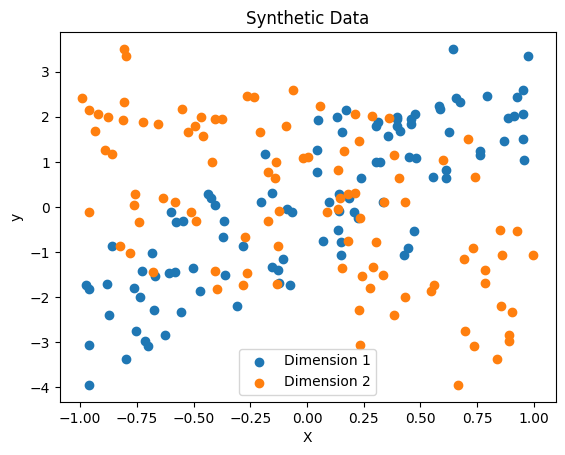

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate Synthetic Data
def generate_data(n_samples=100, noise_variance=0.2):
    np.random.seed(0)
    X = np.random.uniform(-1, 1, (n_samples, 2))  # 2-dimensional input
    true_weights = np.array([2.5, -1.5])
    y = X @ true_weights + np.random.normal(0, np.sqrt(noise_variance), n_samples)
    return X, y, true_weights

X, y, true_weights = generate_data()
plt.scatter(X[:, 0], y, label="Dimension 1")
plt.scatter(X[:, 1], y, label="Dimension 2")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Data")
plt.legend()
plt.show()


In [2]:

# Step 2: Linear Regression using Closed-form Solution
def linear_regression_closed_form(X, y):
    X_design = np.hstack([np.ones((X.shape[0], 1)), X])  # Add intercept term
    w = np.linalg.inv(X_design.T @ X_design) @ X_design.T @ y
    return w

w = linear_regression_closed_form(X, y)
print(f"Learned Weights: {w}")


Learned Weights: [-0.03750288  2.40467652 -1.49338682]


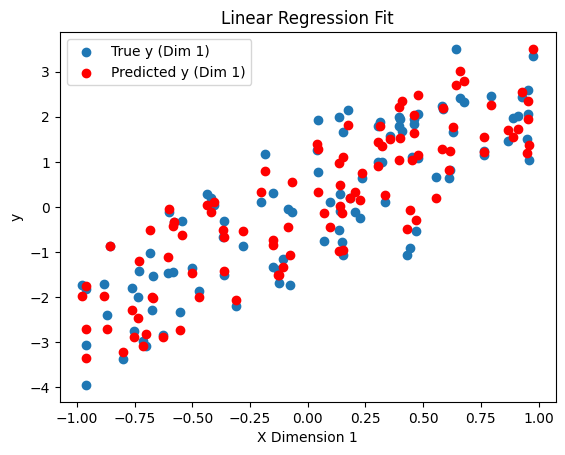

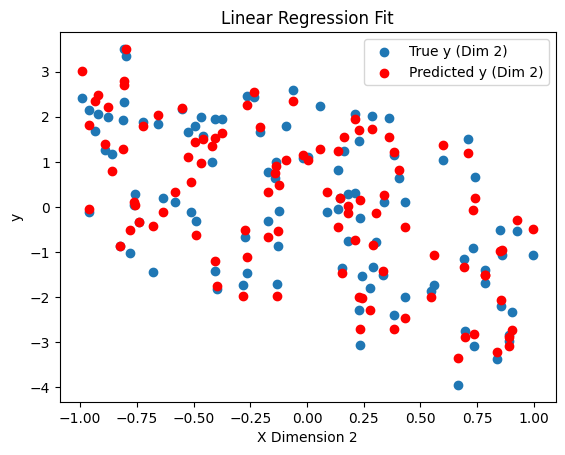

In [3]:

# Step 3: Prediction and Visualization
def predict(X, w):
    X_design = np.hstack([np.ones((X.shape[0], 1)), X])
    return X_design @ w

y_pred = predict(X, w)
plt.scatter(X[:, 0], y, label="True y (Dim 1)")
plt.scatter(X[:, 0], y_pred, label="Predicted y (Dim 1)", color="red")
plt.xlabel("X Dimension 1")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()

plt.scatter(X[:, 1], y, label="True y (Dim 2)")
plt.scatter(X[:, 1], y_pred, label="Predicted y (Dim 2)", color="red")
plt.xlabel("X Dimension 2")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()


In [4]:

# Step 4: Maximum Likelihood Estimation under Gaussian Noise
def maximum_likelihood(X, y, w):
    y_pred = predict(X, w)
    residuals = y - y_pred
    sigma_squared = np.mean(residuals**2)
    log_likelihood = -0.5 * len(y) * np.log(2 * np.pi * sigma_squared) - (0.5 / sigma_squared) * np.sum(residuals**2)
    return log_likelihood, sigma_squared

log_likelihood, sigma_squared = maximum_likelihood(X, y, w)
print(f"Log-Likelihood: {log_likelihood}")
print(f"Estimated Variance (sigma^2): {sigma_squared}")


Log-Likelihood: -53.05522128298052
Estimated Variance (sigma^2): 0.16918328235333932


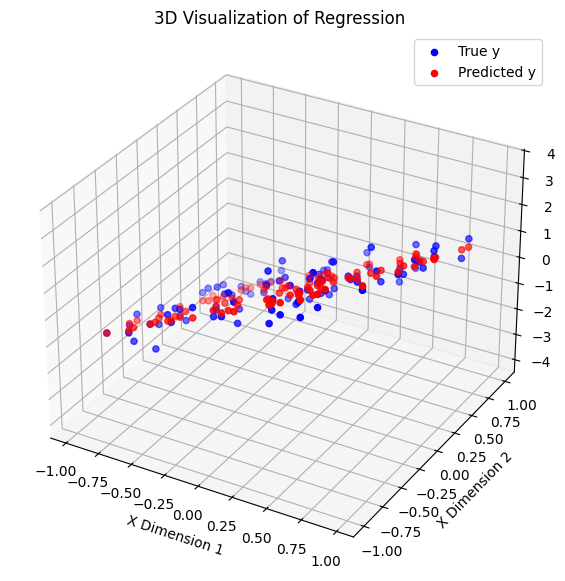

In [5]:

# Step 5: Visualization for Multidimensional Regression
def plot_multidimensional_regression(X, y, y_pred):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], y, label="True y", color="blue")
    ax.scatter(X[:, 0], X[:, 1], y_pred, label="Predicted y", color="red")
    ax.set_xlabel("X Dimension 1")
    ax.set_ylabel("X Dimension 2")
    ax.set_zlabel("y")
    ax.set_title("3D Visualization of Regression")
    ax.legend()
    plt.show()

plot_multidimensional_regression(X, y, y_pred)

# Further steps could include testing with different noise variances or weights.
